

# Project: Investigate a Dataset - [Tmdb_Movies Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The information in the Tmdb_movies dataset entails over 10,000 movies collected from The Movie Database (TMDb). Some key columns include; popularity, budget, revenue, vote count, cast and genres. The cast and genres contains multiple values with a pipe(|) character to distinguish them.


### Question(s) for Analysis
> This analysis aims to answer the following questions;
<ul>
<li><a >What genre is most popular?</a></li>
<li><a >What genres are consistent with their popularity from year to year?</a></li>
<li><a >What are the factors that contribute to high revenues?</a></li>
</ul>

> These questions would enable producers to know the type of genres to produce and how to make proper budgget planning

In [1]:
# Import the necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, the data is being loaded and cleaned for further analysis.

In [2]:
#load the dataset

movies = pd.read_csv('tmdb-movies.csv')

In [3]:
def dataframe_information(movies):
    
    """Dataframe_information:
     
      reveals the basic information about the dataset.
      This information include the first three rows of data, shape, statistics,  null values etc
      
      """
    
    first_three_rows = movies.head(2)
    
    dataframe_size = movies.shape
    
    describe_data = movies.info()
    
    data_statistics = movies.describe()
    
    columns = movies.columns
    
    list_of_columns = list(movies.columns.values.tolist())
    
    duplicate_data = movies.duplicated().sum
    
    null_data = movies.isnull().any().any()

    return first_three_rows, dataframe_size, describe_data, data_statistics, columns, list_of_columns, duplicate_data, null_data

movies_details = dataframe_information(movies)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
#looking at the overview of the dataset
number_of_rows = movies_details[0]
number_of_rows

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [135]:
#checking for the number oof rows and columns in the dataset
size_of_data = movies_details[1]
size_of_data

(10866, 21)

In [136]:
#statistical information about the dataset
data_stats = movies_details[3]
data_stats

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [137]:
number_of_columns = movies_details[4]
number_of_columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [138]:
#using the list of columns to check what is in the data values
columns_list = movies_details[5]
columns_list

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

In [139]:
#checking for duplicates
duplicates = movies_details[6]
duplicates

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
10861    False
10862    False
10863    False
10864    False
10865    False
Length: 10866, dtype: bool>

In [140]:
#checking for null values
null_values = movies_details[7]
null_values

True


### Data Cleaning
> In this section, missing values are being dropped and the columns with the large null values are being dropped.
 

In [141]:
# dropping the columns that have large missing values and are irrelevant to the analysis

movies.drop(['homepage', 'tagline'], axis = 1, inplace = True)

In [5]:
#Eliminating all the null values

movies.dropna(inplace = True)

In [6]:
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [7]:
#Resetting the index
movies.reset_index(inplace = True)

In [8]:
movies.head()

,index,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis

> In this phase, computational statistics and visualizations are being conduted and used. Different variables are being compared together to check for relationships pertaining to the question(s) asked. Also, univariate and multivariate analyses are being carried out with the use of several visualizations like boxplots, histograms, bar chart, heat map and regression plots.





### Research Question 1 (Most Popular Genres from Year to Year)

> In this section of the analysis, descriptive statistics such as the mean, standard deviation are  being computed in order to get the ten most popular genres and the top ten genres that are popluar from year to year respectively.

In [9]:
#copying the dataset in order to attempt the question
movies1 = movies

In [10]:
movies1.head()

,index,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [11]:
#Extracting the genres for easy analysis

movies1['genres'] = movies1['genres'].str.split('|')
movies1.head(2)

,index,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,...,Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,...,An apocalyptic story set in the furthest reach...,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [13]:
#Converting the genres column into a row
movies1 = movies1.explode('genres')
movies1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5123 entries, 0 to 1991
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5123 non-null   int64  
 1   id                    5123 non-null   int64  
 2   imdb_id               5123 non-null   object 
 3   popularity            5123 non-null   float64
 4   budget                5123 non-null   int64  
 5   revenue               5123 non-null   int64  
 6   original_title        5123 non-null   object 
 7   cast                  5123 non-null   object 
 8   homepage              5123 non-null   object 
 9   director              5123 non-null   object 
 10  tagline               5123 non-null   object 
 11  keywords              5123 non-null   object 
 12  overview              5123 non-null   object 
 13  runtime               5123 non-null   int64  
 14  genres                5123 non-null   object 
 15  production_companies 

In [14]:
#Creating a new dataframe which includes the mean popularity for each genre throughout the years

genres1 = movies1.groupby(['genres', 'release_year']).agg({'popularity':'mean'})
genres1

popularity
genres  release_year            
Action  1962            3.170651
        1963            2.508235
        1964            3.153791
        1965            1.910465
        1967            1.554808
...                          ...
Western 2011            1.175800
        2012            2.242083
        2013            1.214510
        2014            0.384210
        2015            7.504550

[555 rows x 1 columns]

In [15]:
#Summarizing the top ten genres according to their popularity based on their mean and standard deviation
popular_genres = genres1.groupby(['genres']).agg(Mean = ('popularity',np.mean), Std = ('popularity', np.std)).sort_values(by = 'Mean', ascending = False)[:10]

In [16]:
popular_genres

,Mean,Std
genres,,
Adventure,2.432356,1.357743
Science Fiction,2.257938,2.212622
Fantasy,2.094327,1.297951
Action,1.977994,1.345452
Family,1.865905,1.257691
Animation,1.805695,0.935372
Thriller,1.655154,0.908937
Western,1.647450,2.137505
Mystery,1.476491,0.958151


In [149]:
#Resetting the index
popular_genres= popular_genres.reset_index()

In [150]:
popular_genres

,genres,Mean,Std
0,Adventure,1.020115,0.554994
1,Animation,0.995250,0.593336
2,Fantasy,0.868396,0.525228
3,Science Fiction,0.847907,0.529380
4,Action,0.831491,0.425811
5,Family,0.789227,0.333569
6,Thriller,0.690034,0.249981
7,Crime,0.680312,0.315649
8,War,0.680307,0.353006
9,Mystery,0.610109,0.328964


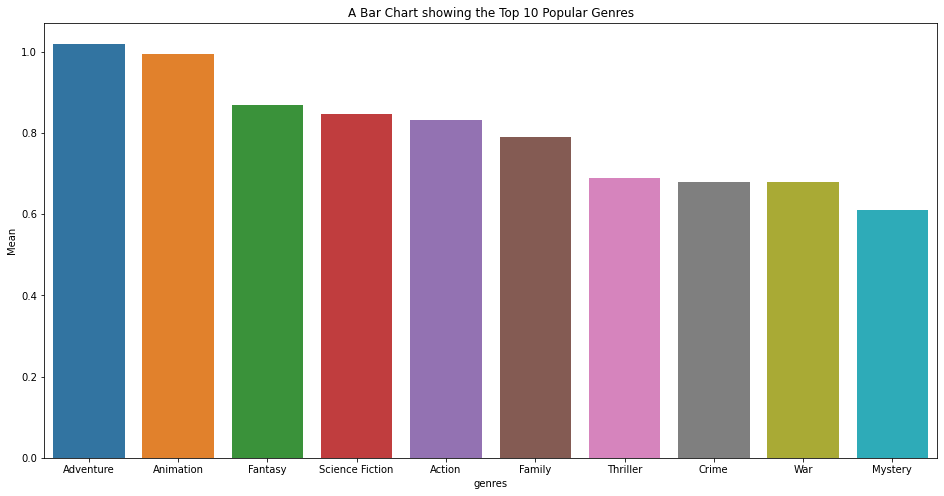

In [151]:
#Plotting a bar chart showing the top ten popular genres
plt.figure(figsize = (16,8))
plt.xlabel ('Movie_Genres')
plt.ylabel ('Mean')
plt.title('A Bar Chart showing the Top 10 Popular Genres')
sns.barplot(data = popular_genres, x = 'genres', y = 'Mean');

> The chart above indicates that adventure is the most popular gene due to the fact that it had the highest mean. This means most people tend to watch movies with adventure

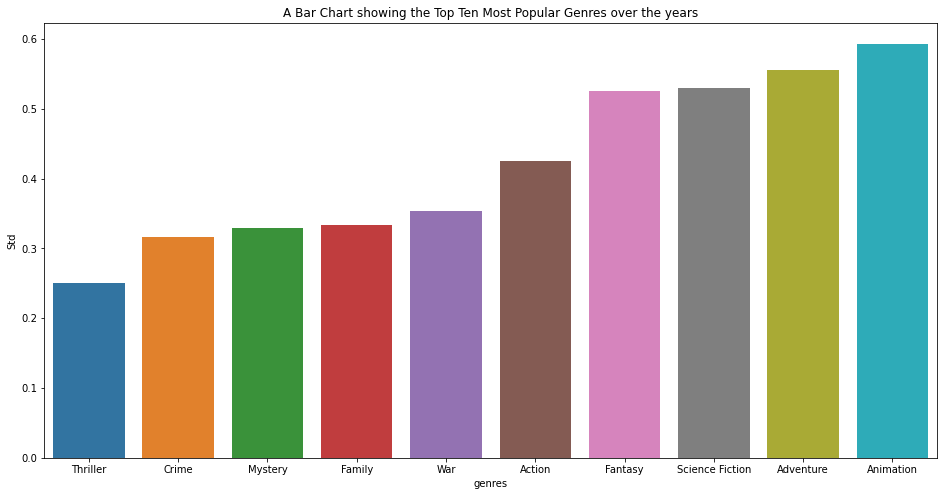

In [152]:
#Plotting a bar chart showing the genres that are most popular from year to year
plt.figure(figsize = (16,8))
plt.xlabel ('Movie_Genres')
plt.ylabel ('Standard deviation')
plt.title('A Bar Chart showing the Top Ten Most Popular Genres over the years')
sns.barplot(data = popular_genres, x = 'genres', y = 'Std', order=popular_genres.sort_values('Std').genres);

# <a id='eda'></a>
> As illustrated in the chart above, the genre that has been consistent with its popularity is thriller, owing to the fact that it had  the lowest standard deviation of 0.25. In other words, although adventure is the most popular genre, thriller has sustained its popularity over the years

### Research Question 2  (Factors that determine high revenue)

> In this section, the distribution, correlation and relationship between varaibles will analysed. Four independent variables (vote_count, popularity, budget and release_month) will be considered in relation to a dependent variable (revenue). Relevant statsitics such as the mean, count will be computed for effective analysis.

In [153]:
#Taking a quick look at the dataframe for a refresher
movies.head(2)

,index,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


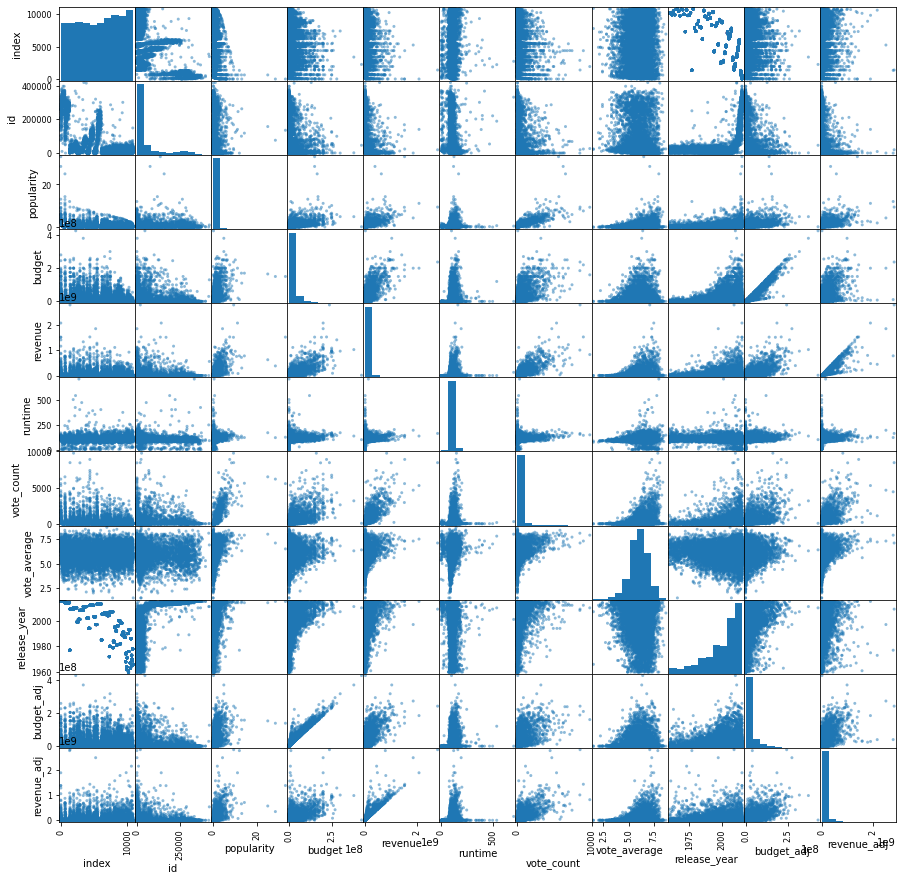

In [154]:
#looking at the distribution of the set of observations

pd.plotting.scatter_matrix(movies, figsize = (15, 15));

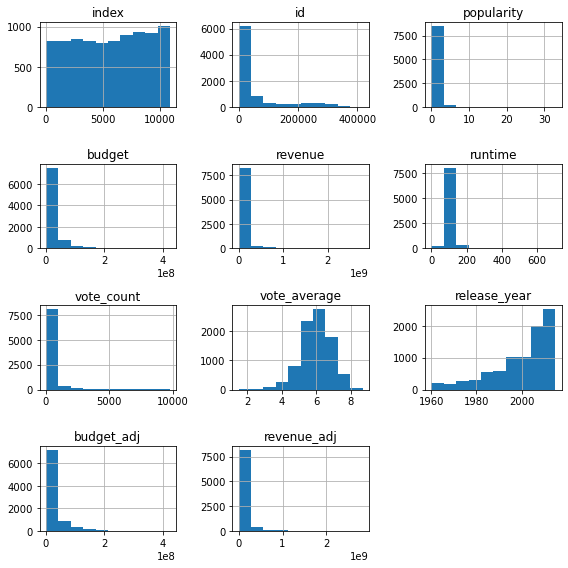

In [155]:
#showing the shape and trends in the distribution of the data

movies.hist(figsize = (8, 8))
plt.title('A histogram showing the distribution of the data')
plt.tight_layout();

> Looking at the above histogram charts, it can be seen that while some variables are skewed to the right, others are skewed to the left. However, vote_average seems to be normally distributed, owing to the fact that it was mean that was being considered.

In [156]:
#showing the disparity of the values

def my_boxplot(a):
    
    return sns.boxplot(x=movies[a]);


<AxesSubplot:title={'center':'A box plot showing the disparity of the revenue'}, xlabel='revenue'>

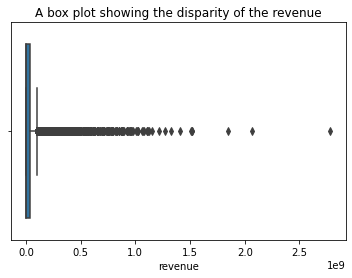

In [157]:
plt.title ('A box plot showing the disparity of the revenue')
my_boxplot ('revenue')

> A close disparity between the variables an be seen in the above chart

<AxesSubplot:title={'center':'A box plot showing the disparity of the budget variable'}, xlabel='budget'>

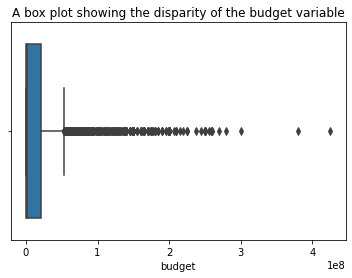

In [158]:
plt.title ('A box plot showing the disparity of the budget variable')
my_boxplot ('budget')

> The box plot shows that the values are skewed to the right.

<AxesSubplot:title={'center':'A box plot showing the dispersion of the popularity variable '}, xlabel='popularity'>

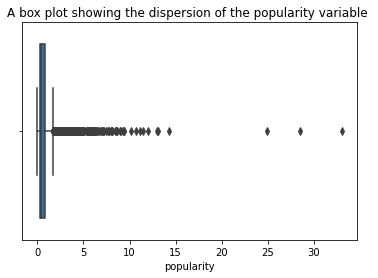

In [159]:
plt.title ('A box plot showing the dispersion of the popularity variable ')
my_boxplot ('popularity')

> In the above diagram, it can be seen that there are very few outliers which means that the values are highly dispersed closely to one another.

In [160]:
#Checking for possible relationships between variables
movies.corr()

,index,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
index,1.000000,-0.547279,-0.166127,-0.122173,-0.080481,0.082353,-0.141816,0.068058,-0.728552,-0.039933,0.011899
id,-0.547279,1.000000,0.030805,-0.116657,-0.079768,-0.095321,-0.005831,-0.070937,0.495268,-0.170370,-0.125449
popularity,-0.166127,0.030805,1.000000,0.533138,0.659147,0.164358,0.801425,0.244964,0.137064,0.497866,0.601615
budget,-0.122173,-0.116657,0.533138,1.000000,0.729306,0.227814,0.624865,0.089802,0.170286,0.967399,0.611255
revenue,-0.080481,-0.079768,0.659147,0.729306,1.000000,0.195052,0.786638,0.194492,0.095542,0.699423,0.916591
runtime,0.082353,-0.095321,0.164358,0.227814,0.195052,1.000000,0.197009,0.204055,-0.127825,0.266877,0.211726
vote_count,-0.141816,-0.005831,0.801425,0.624865,0.786638,0.197009,1.000000,0.288443,0.149831,0.576518,0.700341
vote_average,0.068058,-0.070937,0.244964,0.089802,0.194492,0.204055,0.288443,1.000000,-0.124280,0.102918,0.218336
release_year,-0.728552,0.495268,0.137064,0.170286,0.095542,-0.127825,0.149831,-0.124280,1.000000,0.065651,-0.037938
budget_adj,-0.039933,-0.170370,0.497866,0.967399,0.699423,0.266877,0.576518,0.102918,0.065651,1.000000,0.635861


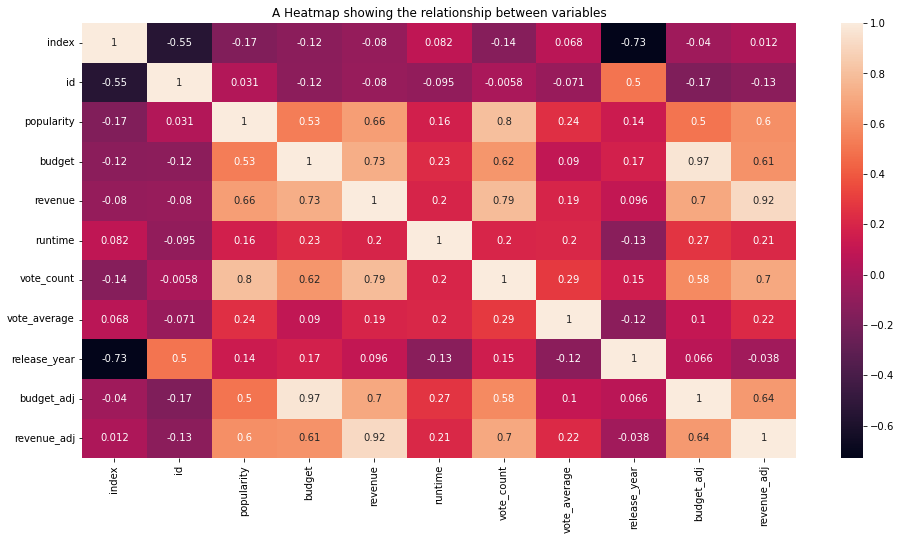

In [161]:
#Presenting it on a heatmap for more visibility
plt.figure(figsize = (16,8))
plt.title('A Heatmap showing the relationship between variables')
sns.heatmap(movies.corr(), annot = True);

> The above heatmap shows the correlation between variables on each axis in a square. The correlation ranges from -1 to 1. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. The diagonals are all 1/light cream because those squares are correlating each variable to itself (that is,  it's a perfect correlation). The larger the number and lighter the color and the higher the correlation between the two variables. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.   

In [162]:
#checking the relationship between variables

def my_plots(a, b):
    return sns.regplot(data =movies, x = a, y = b)

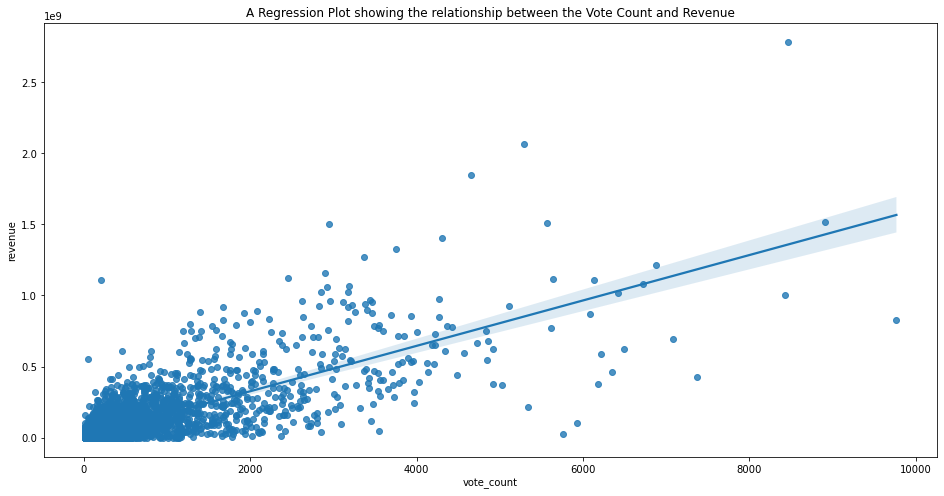

In [163]:
#Plotting the revenue against the vote count to check for correlation
plt.figure(figsize= (16,8))
plt.title('A Regression Plot showing the relationship between the Vote Count and Revenue')
my_plots('vote_count', 'revenue');

> According to the above regression plot, it can be clearly seen that the vote count has a positive relationship wth the revenue, which means that, as the vote count increases, the revenue increases. 

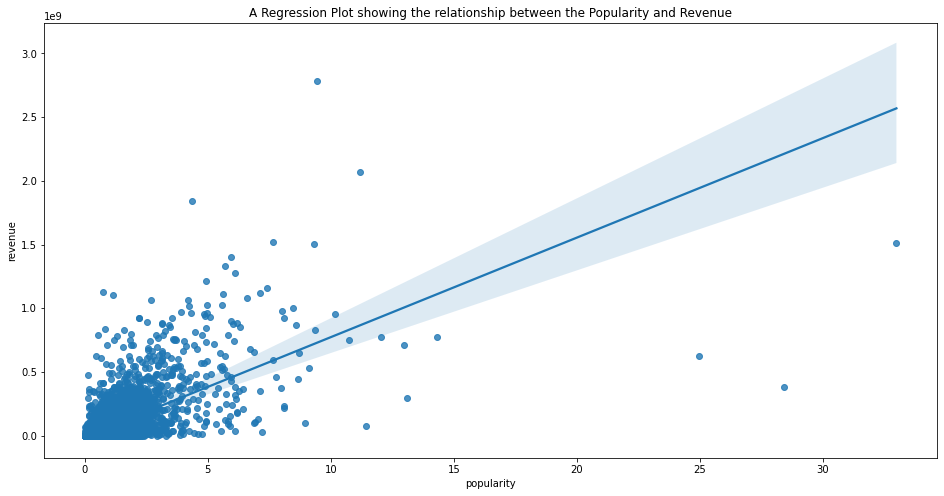

In [164]:
#Plotting the revenue against popularity to check for correlation
plt.figure(figsize = (16,8))
plt.title('A Regression Plot showing the relationship between the Popularity and Revenue')
my_plots('popularity', 'revenue');

> The above regression plot clearly shows that the more popular a movie is, the more its revenue. This is based on the fact that a positive relationship exists between the two variables, with high confidence level

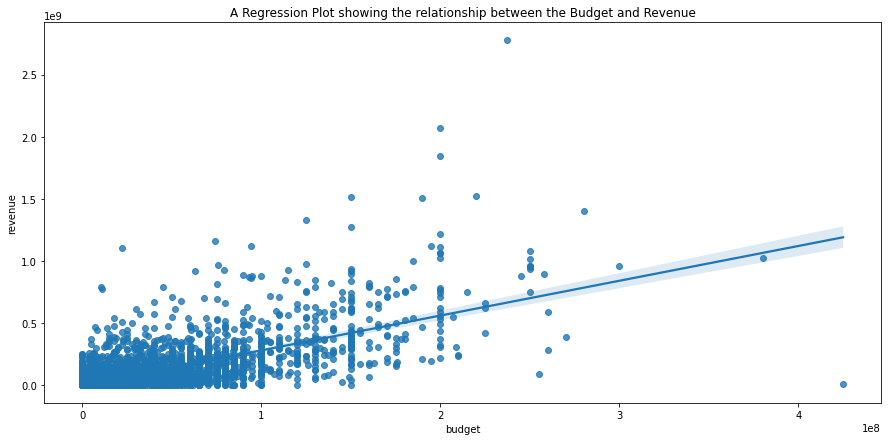

In [165]:
#Plotting the revenue against budget to check for correlation
plt.figure(figsize = (15,7))
plt.title('A Regression Plot showing the relationship between the Budget and Revenue')
my_plots('budget', 'revenue');

> The above plot shows taht there is a positive relationship between the budget of a movie and its revenue. This means that as the budget increases, the revenue also increases.

In [166]:
#Checking for possible correlation betwen the revenue and the number of movies released in a month
#The first step is to extract the month from the release date
movies['year'] = pd.to_datetime(movies['release_date']).dt.year
movies['month'] = pd.to_datetime(movies['release_date']).dt.month
movies['month_name'] = pd.to_datetime(movies['release_date']).dt.month_name(locale="English")

In [17]:
No_zero = movies[(movies['revenue'] !=0)]

In [19]:
No_zero.head()

,index,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,...,Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,...,An apocalyptic story set in the furthest reach...,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,...,Beatrice Prior must confront her inner demons ...,119,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,...,Thirty years after defeating the Galactic Empi...,136,"[Action, Adventure, Science Fiction, Fantasy]",Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,...,Deckard Shaw seeks revenge against Dominic Tor...,137,"[Action, Crime, Thriller]",Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [167]:
#Secondly, movies with zero budget and revenue would be removed
No_zero = movies[~(movies['revenue'] ==0)]

In [168]:
No_zero.describe()

,index,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,year,month
count,4537.000000,4537.000000,4537.000000,4.537000e+03,4.537000e+03,4537.000000,4537.000000,4537.000000,4537.000000,4.537000e+03,4.537000e+03,4537.000000,4537.000000
mean,5646.318933,42392.252810,1.088580,3.089653e+07,9.406869e+07,108.432004,460.551025,6.163324,2000.606789,3.679115e+07,1.215275e+08,2002.987216,6.985012
std,3076.725104,70746.373193,1.389129,4.121818e+07,1.659776e+08,21.260402,827.184867,0.792577,11.660150,4.439995e+07,2.035435e+08,14.285567,3.367843
min,0.000000,5.000000,0.001783,0.000000e+00,2.000000e+00,26.000000,10.000000,2.100000,1960.000000,0.000000e+00,2.861934e+00,1972.000000,1.000000
25%,2983.000000,7485.000000,0.415262,2.500000e+06,9.584131e+06,95.000000,53.000000,5.700000,1993.000000,3.877592e+06,1.318284e+07,1995.000000,4.000000
50%,5676.000000,11622.000000,0.718616,1.700000e+07,3.538721e+07,105.000000,164.000000,6.200000,2004.000000,2.222307e+07,4.950794e+07,2004.000000,7.000000
75%,8315.000000,39939.000000,1.254928,4.000000e+07,1.051731e+08,118.000000,472.000000,6.700000,2010.000000,5.195004e+07,1.402184e+08,2011.000000,10.000000
max,10848.000000,417859.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09,2071.000000,12.000000


In [169]:
#Creating a new dataframe showing the months, count of revenue, which imples the number of movies released, and the mean of the revenue
budget_movies = No_zero.groupby('month_name').agg(count = ('revenue', 'count'), Mean = ('revenue',np.mean)).sort_values (by = 'count', ascending = False)

In [170]:
#Resetting the index
budget_movies.reset_index(inplace=True)

In [171]:
#Checking the dataframe
budget_movies

,month_name,count,Mean
0,September,560,4.507132e+07
1,December,472,1.217931e+08
2,October,428,6.743388e+07
3,August,402,6.239131e+07
4,June,387,1.584409e+08
5,July,354,1.249094e+08
6,March,352,8.846775e+07
7,May,350,1.429457e+08
8,November,341,1.326722e+08
9,April,313,8.323708e+07


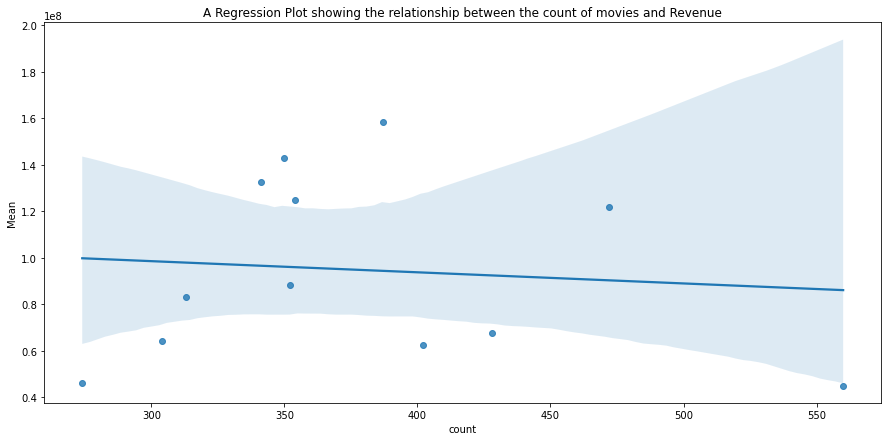

In [172]:
#Plotting the revenue against the count of movies released in a month to check for correlation
plt.figure(figsize = (15,7))
plt.title('A Regression Plot showing the relationship between the count of movies and Revenue')
sns.regplot(data=budget_movies,x='count',y='Mean');

> As seen in the above plot, there is no relationship between the release_month of a movie and its revenue. As seen in confidence interval, the revenue of a movie is highly independent of its release month

<a id='conclusions'></a>
## Conclusions

> The significant finding of this analysis is that a particular genre can be the most popular, however, its popularity may not be consistent over the years. This is a case of the adventure and thriller genres.

> The main factors that contribute to  a movie being high in revenue include the popularity, vote count and budget as they all have positive relationship with the revenue. This means that the more popular a movie is, the more the revenue. Likewise, the more votes a movie get, the higher its revenue. A well-budgeted movie would yield a high revenue. Lastly, the count of movies in a particular month does not affect their different revenues.

> Another key takehome here is that not all real world scenarios are statiscally true, For instance, it is expected that in a real world, the number of movies released in a month or a particular period should determine the revenue of the movies as competition would likely set in. However, this is not statistically correct as there is no relationship whatsoever with both variables. 

## Limitations

> The dataset contains a total of 10866 samples, which is a good representative of the population. However, the dataset includes zero budget values and zero revenue values which could be a limiting factor. These zero values took a larger percentage of the dataset, and this in a way could be a limiting factor to getting a clearer insight of the analysis. For instance,  in the later part of the analysis, the zero values were being removed, which resulted into a very small fraction of the dataset. 